In [2]:
# load data
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(f"data shape: {x_train.shape}\nlabel shape: {y_train.shape}")

data shape: (404, 13)
label shape: (404,)


In [3]:
print(f"first datapoint: {x_train[0]}")

first datapoint: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [4]:
# the features have different ranges, so it will be better to normalize the data of every feature
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

print(f"transformed first datapoint: {x_train[0]}")

transformed first datapoint: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [5]:
# model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def build_model():
    model = Sequential([
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [11]:
# because of few datapoints in the dataset, we use k-fold cross-validation
# to evaluate the model
import numpy as np

k = 4
num_val_samples = len(x_train) // k
num_epochs = 500 #100
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    
    # extract validation data
    val_data = x_train[(i * num_val_samples):((i+1) * num_val_samples)]
    val_targets = y_train[(i * num_val_samples): ((i+1) * num_val_samples)]
    
    # get remaining data for training
    partial_train_data = np.concatenate(
        [x_train[: i * num_val_samples],
         x_train[(i+1)* num_val_samples:]]
    )

    partial_train_targets = np.concatenate(
        [y_train[: i * num_val_samples],
         y_train[(i+1)*num_val_samples:]]
    )

    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=16, 
                        verbose=0,
                        validation_data=(val_data, val_targets))
    #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [12]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

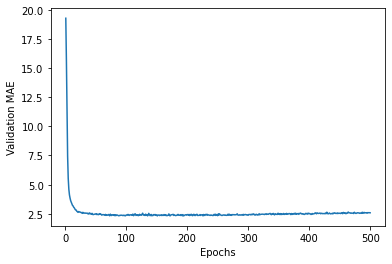

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

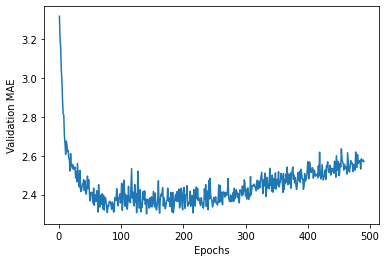

In [15]:
# truncate history
truncated_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_history) +1), truncated_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()